In [48]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
den =pd.read_csv('datasets\dengue.csv')

In [50]:
den

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [51]:
den.dtypes


Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [52]:
den.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [53]:
den.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [54]:
den.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


<h1>1. Region of with the highest dengue cases<h1>

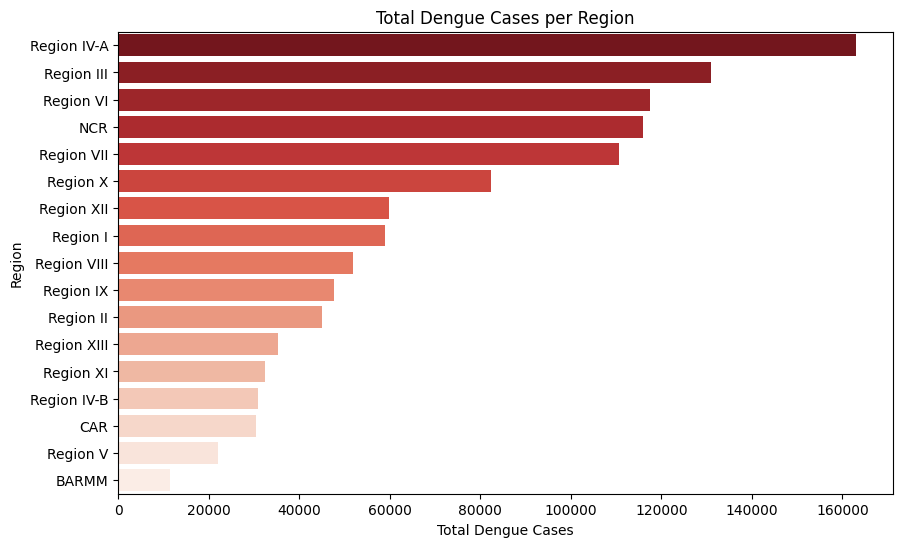

In [55]:
high_cases= den.groupby('Region')['Dengue_Cases'].sum().max()
region_cases = den.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x=region_cases.values, y=region_cases.index, palette='Reds_r')

plt.title('Total Dengue Cases per Region')
plt.xlabel('Total Dengue Cases')
plt.ylabel('Region')
plt.show()


NameError: name 'region_high' is not defined

<h1>2. Dengue Cases Per Region Highest and Lowest</h1>

In [ ]:
region_compare = den.groupby('Region')[['Dengue_Cases']].sum().reset_index()
region_compare = region_compare.sort_values(by='Dengue_Cases', ascending=False)
region_compare.head(5), region_compare.tail(5)


In [ ]:
top_5 = region_compare.head(5)
bottom_5 = region_compare.tail(5)

# Create figure
plt.figure(figsize=(12,6))

# Plot top 5 regions in red
sns.barplot(x=top_5['Dengue_Cases'], y=top_5['Region'], palette='Reds', label="Top 5 Regions")

# Plot bottom 5 regions in blue
sns.barplot(x=bottom_5['Dengue_Cases'], y=bottom_5['Region'], palette='Blues', label="Bottom 5 Regions")

# Titles & Labels
plt.title('Top 5 vs Bottom 5 Dengue Cases per Region')
plt.xlabel('Total Dengue Cases')
plt.ylabel('Region')


# Show the plot
plt.show()

<h1>3. Top 5 region with the most dengue deaths</h1>

In [ ]:
top5= den.groupby('Region')[['Dengue_Deaths']].sum().reset_index()
top5=top5.sort_values(by='Dengue_Deaths',ascending=False).head(5)

In [ ]:
top5

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=top5['Dengue_Deaths'], y=top5['Region'], palette='Reds_r')

plt.title('Top 5 Regions with Highest Dengue Deaths')
plt.xlabel('Total Dengue Deaths')
plt.ylabel('Region')
plt.show()

<h1>3. Yearly Dengue Cases Increasing or Not?</h1>

In [ ]:
yearly=den.groupby('Year')[['Dengue_Cases']].sum().reset_index()
yearly

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly['Year'], y=yearly['Dengue_Cases'], marker='o', linestyle='-')

plt.title('Dengue Cases Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<h1>4. Top 5 Regions with lowest Dengue Deaths</h1>

In [ ]:
high=den.groupby('Region')[['Dengue_Deaths']].sum().reset_index()
high=high.sort_values(by='Dengue_Deaths',ascending=True).head(5)

(high)

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=high['Dengue_Deaths'], y=high['Region'], palette='Blues_r')

plt.title('Bottom 5 Regions with Lowest Dengue Deaths')
plt.xlabel('Total Dengue Deaths')
plt.ylabel('Region')
plt.show()

<h1>5. Fatality rate of the top 3 most affected regions over the years</h1>

In [ ]:
top3=den.groupby('Region')['Dengue_Cases'].sum().nlargest(3).index

top_fatal= den[den['Region'].isin(top3)]

top_fatal=den.groupby(['Year','Region']).sum()[['Dengue_Cases','Dengue_Deaths']].reset_index()
top_fatal['Fatality Rate(%)']=(top_fatal['Dengue_Deaths'] / top_fatal['Dengue_Cases'])

top_fatal



In [ ]:
plt.figure(figsize=(12,6))

# Plot fatality rate for each top 3 region
for region in top3:
    data = top_fatal[top_fatal['Region'] == region]
    plt.plot(data['Year'], data['Fatality Rate(%)'], marker='o', linestyle='-', label=region)

plt.title('Fatality Rate Over the Years for Top 3 Regions')
plt.xlabel('Year')
plt.ylabel('Fatality Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

<h1>6. Top 5 regions with the most dengue cases</h1>

In [ ]:
top_c= den.groupby('Region')['Dengue_Cases'].sum().nlargest(5)
top_c

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(top_c, labels=top_c.index, autopct='%1.1f%%', colors=['red', 'orange', 'yellow', 'pink', 'brown'])
plt.title('Proportion of Dengue Cases in Top 5 Regions')
plt.show()

<h1>7. What is overall fatality rate per region?</h1>

In [ ]:
fatal= den.groupby('Region').sum()[['Dengue_Cases','Dengue_Deaths']]
fatal['Fatality Rate (%)'] = (fatal['Dengue_Deaths'] / fatal['Dengue_Cases']) * 100
fatal


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=fatal['Dengue_Cases'], y=fatal['Fatality Rate (%)'], hue=fatal.index, s=100, palette='coolwarm')

plt.title('Fatality Rate vs. Dengue Cases by Region')
plt.xlabel('Total Dengue Cases')
plt.ylabel('Fatality Rate (%)')
plt.grid(True)
plt.show()

<h1>8. How many Dengue cases were reported Each Year?</h1>

In [ ]:
year = den.groupby('Year')['Dengue_Cases'].sum()
year

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(year.index, year.values, marker='o', linestyle='-', color='red')

plt.title('Yearly Dengue Cases Trend')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis for readability
plt.show()



<h1>9. What are the worst dengue months?</h1>

In [ ]:
month= den.groupby('Month')['Dengue_Cases'].sum().sort_values(ascending=False)
month

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=month.index, y=month.values, palette='Reds_r')

plt.title('Total Dengue Cases Per Month')
plt.xlabel('Month')
plt.ylabel('Total Dengue Cases')
plt.show()

<h1>10. is there a correlation between dengue cases and deaths?</h1>

In [ ]:
corr = den['Dengue_Cases'].corr(den['Dengue_Deaths'])
corr

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=den['Dengue_Cases'], y=den['Dengue_Deaths'], alpha=0.6, color='red')

plt.title('Correlation Between Dengue Cases and Deaths')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.grid(True)
plt.show()

<h1>11. Which regions have the most consistent dengue cases?</h1>

In [ ]:
reg= den.groupby('Region')['Dengue_Cases'].std().sort_values()
reg

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=reg.values ,y=reg.index , palette='viridis')
plt.title('regions have the most consistent dengue cases')
plt.show()

<h1>12. Which region had the highest and lowest dengue cases?</h1>

In [ ]:
max_region = den.loc[den['Dengue_Cases'].idxmax()]
min_region = den.loc[den['Dengue_Cases'].idxmin()]

max_region[['Region','Dengue_Cases']] , min_region[['Region','Dengue_Cases']]

In [ ]:
regions = [max_region['Region'], min_region['Region']]
cases = [max_region['Dengue_Cases'], min_region['Dengue_Cases']]

plt.figure(figsize=(8,5))
sns.barplot(x=regions, y=cases, palette=['darkred', 'green'])

plt.title('Region with Highest & Lowest Dengue Cases')
plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.show()

<h1>13. Top 3 region with the highest fatality rate</h1>

In [ ]:
fatal_rate = den.groupby('Region').sum()[['Dengue_Cases','Dengue_Deaths']]
fatal_rate['Fatality Rate (%)'] = (fatal_rate['Dengue_Deaths'] / fatal_rate['Dengue_Cases']) * 100
top3= fatal_rate.nlargest(3,'Fatality Rate (%)')
top3

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=top3.index, y=top3['Fatality Rate (%)'], palette='Reds_r')

plt.title('Top 3 Regions with Highest Fatality Rate (%)')
plt.xlabel('Region')
plt.ylabel('Fatality Rate (%)')
plt.ylim(0, top3['Fatality Rate (%)'].max() + 1)  # Adjusts y-axis for better visibility
plt.show()

<h1>14. Which region had the biggest dengue outbreak in a single year?</h1>

In [ ]:
big = den.loc[den['Dengue_Cases'].idxmax(),['Year','Region','Dengue_Cases']]
big

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=[big['Region']], y=[big['Dengue_Cases']], color='red')

plt.title(f"Worst Dengue Outbreak in {big['Year']}")
plt.xlabel("Region")
plt.ylabel("Total Dengue Cases")
plt.ylim(0, big['Dengue_Cases'] + 1000)  # Adjust height for better visibility
plt.show()

<h1>15. Which region had the highest total dengue  cases over all years?</h1>

In [ ]:
reg_total = den.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)
reg_total

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(reg_total.head(10), labels=reg_total.head(10).index, autopct='%1.1f%%', colors=sns.color_palette('Reds', 10))

plt.title('Proportion of Dengue Cases in Top 10 Regions')
plt.show()

<h1>16. which year had the highest number of cases for each region</h1>

In [ ]:
high_case= den.loc[den.groupby('Region')['Dengue_Cases'].idxmax(),['Region','Year','Dengue_Cases']]
high_case


In [ ]:
heatmap_data = high_case.pivot(index='Region', columns='Year', values='Dengue_Cases')

# Create the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt=".0f", linewidths=0.5)

plt.title('Peak Dengue Cases per Region by Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()

<h1>17. Which Regions Have the Most Unstable Dengue Cases Over the Years?</h1>

In [ ]:
region_volatile = den.groupby('Region')['Dengue_Cases'].std().sort_values(ascending= False)
region_volatile

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=region_volatile.values, y=region_volatile.index, palette='coolwarm')

plt.title('Variability of Dengue Cases Across Regions (Standard Deviation)')
plt.xlabel('Standard Deviation of Dengue Cases')
plt.ylabel('Region')
plt.show()


<h1>18. Are Fatality Rates Declining Over the Years?</h1>

In [ ]:
fatality_trend = den.groupby("Year")["Dengue_Deaths"].sum() / den.groupby("Year")["Dengue_Cases"].sum()
fatality_trend

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=fatality_trend.index, y=fatality_trend.values, marker='o', color='red')

plt.title("Dengue Fatality Rate Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Fatality Rate (%)")
plt.ylim(0, fatality_trend.max() * 1.2)  # Adjust Y-axis for better visibility
plt.grid(True)
plt.show()

<h1>19. Which Year Had the Highest Overall Dengue Cases?</h1>

In [ ]:
highest_case_year = den.groupby("Year")["Dengue_Cases"].sum().idxmax()
highest_case_year




In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_cases.index, y=yearly_cases.values, marker='o', color='red')

# Annotate the highest case year
plt.text(highest_case_year, yearly_cases.max(), f"Peak: {highest_case_year}", 
         ha="right", va="bottom", fontsize=12, color="black", fontweight="bold")

plt.title("Dengue Cases Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.grid(True)
plt.show()

<h1>20. Which Regions Have the Most Fatalities Compared to Total Deaths?</h1>

In [ ]:
region_fatality_share = (den.groupby("Region")["Dengue_Deaths"].sum() / den["Dengue_Deaths"].sum()) * 100
region_fatality_share.sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(10,6))
region_fatality_share.sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', cmap='Reds')

plt.title("Share of Dengue Fatalities by Region")
plt.ylabel("")  # Remove ylabel for clarity
plt.show()

In [ ]:
total

In [ ]:
den